In [19]:
import pandas as pd 
from sklearn import *
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import MinMaxScaler, StandardScaler
from sklearn.metrics import accuracy_score, f1_score, confusion_matrix, classification_report, precision_score, recall_score
from sklearn.ensemble import RandomForestClassifier, BaggingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV


In [20]:
#Load Dataframe
df = pd.read_csv('IOT_cleaned.csv')
df.head()

,id_orig_p,id_resp_p,proto,service,flow_duration,fwd_pkts_tot,bwd_pkts_tot,fwd_data_pkts_tot,bwd_data_pkts_tot,fwd_pkts_per_sec,...,idle_min,idle_max,idle_tot,idle_avg,idle_std,fwd_init_window_size,bwd_init_window_size,fwd_last_window_size,Attack_type,Attack
0,38667,1883,tcp,mqtt,32.011598,9,5,3,3,0.281148,...,2.972918e+07,2.972918e+07,2.972918e+07,2.972918e+07,0.0,64240,26847,502,MQTT_Publish,Normal
1,51143,1883,tcp,mqtt,31.883584,9,5,3,3,0.282277,...,2.985528e+07,2.985528e+07,2.985528e+07,2.985528e+07,0.0,64240,26847,502,MQTT_Publish,Normal
2,44761,1883,tcp,mqtt,32.124053,9,5,3,3,0.280164,...,2.984215e+07,2.984215e+07,2.984215e+07,2.984215e+07,0.0,64240,26847,502,MQTT_Publish,Normal
3,60893,1883,tcp,mqtt,31.961063,9,5,3,3,0.281593,...,2.991377e+07,2.991377e+07,2.991377e+07,2.991377e+07,0.0,64240,26847,502,MQTT_Publish,Normal
4,51087,1883,tcp,mqtt,31.902362,9,5,3,3,0.282111,...,2.981470e+07,2.981470e+07,2.981470e+07,2.981470e+07,0.0,64240,26847,502,MQTT_Publish,Normal


In [21]:
from sklearn.preprocessing import LabelEncoder

In [23]:
# Initialize LabelEncoder
label_encoder = LabelEncoder()

# Apply LabelEncoder to categorical columns
for column in df.columns:
    if df[column].dtype == 'object' or df[column].dtype.name == 'category':
        df[column] = label_encoder.fit_transform(df[column]) 

In [53]:
import pandas as pd

# Calculate variance
variance = df.var()


if variance['fwd_header_size_min'] < 0.1 * variance['fwd_header_size_tot'] and \
   variance['fwd_header_size_max'] < 0.1 * variance['fwd_header_size_tot']:
    print("\nForward min and max header sizes might be redundant compared to total.")
else:
    print("\nForward min and max header sizes provide additional information.")

if variance['bwd_header_size_min'] < 0.1 * variance['bwd_header_size_tot'] and \
   variance['bwd_header_size_max'] < 0.1 * variance['bwd_header_size_tot']:
    print("Backward min and max header sizes might be redundant compared to total.")
else:
    print("Backward min and max header sizes provide additional information.")



Forward min and max header sizes might be redundant compared to total.
Backward min and max header sizes might be redundant compared to total.


In [51]:
import pandas as pd

# Assuming 'df' is your DataFrame containing the relevant columns
columns_to_check = [
    'fwd_pkts_payload_min', 'fwd_pkts_payload_max', 'fwd_pkts_payload_avg', 'fwd_pkts_payload_std',
    'bwd_pkts_payload_min', 'bwd_pkts_payload_max', 'bwd_pkts_payload_avg', 'bwd_pkts_payload_std',
    'flow_pkts_payload_min', 'flow_pkts_payload_max', 'flow_pkts_payload_avg', 'flow_pkts_payload_std'
]

# Calculate correlation matrix
correlation_matrix = df[columns_to_check].corr()

# Identify potentially redundant columns based on high correlation (> 0.9)
redundant_features = {}
for col in columns_to_check:
    high_corr_cols = correlation_matrix[col][(correlation_matrix[col] > 0.9) & (correlation_matrix[col] < 1)].index.tolist()
    if high_corr_cols:
        redundant_features[col] = high_corr_cols

print("\nPotentially Redundant Features Based on High Correlation (> 0.9):")
for key, value in redundant_features.items():
    print(f"{key} is highly correlated with {value}")

# Calculate variance for each column
variances = df[columns_to_check].var()

# Print variance
print("\nVariances of Payload Features:")
print(variances)



Potentially Redundant Features Based on High Correlation (> 0.9):
fwd_pkts_payload_max is highly correlated with ['fwd_pkts_payload_std']
fwd_pkts_payload_std is highly correlated with ['fwd_pkts_payload_max']
bwd_pkts_payload_max is highly correlated with ['bwd_pkts_payload_std', 'flow_pkts_payload_max']
bwd_pkts_payload_std is highly correlated with ['bwd_pkts_payload_max', 'flow_pkts_payload_max']
flow_pkts_payload_max is highly correlated with ['bwd_pkts_payload_max', 'bwd_pkts_payload_std']

Variances of Payload Features:
fwd_pkts_payload_min      2049.825220
fwd_pkts_payload_max     14713.626545
fwd_pkts_payload_avg      2125.008597
fwd_pkts_payload_std      2028.772513
bwd_pkts_payload_min       384.599146
bwd_pkts_payload_max     53502.163117
bwd_pkts_payload_avg      6969.420964
bwd_pkts_payload_std      8723.110952
flow_pkts_payload_min     1258.278862
flow_pkts_payload_max    47625.379761
flow_pkts_payload_avg     2541.384365
flow_pkts_payload_std     5478.946067
dtype: flo

###### Dropping:
fwd_data_pkts_tot (subset of fwd_pkts_tot)  

bwd_data_pkts_tot (subset of bwd_pkts_tot) 

fwd_header_size_tot, fwd_header_size_min, (little variance to fwd_header_size_max)  

bwd_header_size_tot, bwd_header_size_min, (little variance to bwd_header_size_max)  

fwd_pkts_payload_max (high correlation with fwd_pkts_payload_std)  

bwd_pkts_payload_max (high correlation with bwd_pkts_payload_std and flow_pkts_payload_max)  

bwd_pkts_payload_min (low variance to bwd_pkts_payload_avg and bwd_pkts_payload_std)  

flow_pkts_payload_min, flow_pkts_payload_max, flow_pkts_payload_avg, flow_pkts_payload_std (are very similar to fwd and bwd payload features)  

'fwd_iat_min', 'fwd_iat_max' (avg and std sufficient)  

'bwd_iat_min', 'bwd_iat_max' (avg and std sufficient)  

'flow_iat_min', 'flow_iat_max', 'flow_iat_avg', 'flow_iat_std' (overlap with fwd and bwd iat features)




In [161]:
df.columns

Index(['id_orig_p', 'id_resp_p', 'proto', 'service', 'flow_duration',
       'fwd_pkts_tot', 'bwd_pkts_tot', 'fwd_data_pkts_tot',
       'bwd_data_pkts_tot', 'fwd_pkts_per_sec', 'bwd_pkts_per_sec',
       'flow_pkts_per_sec', 'down_up_ratio', 'fwd_header_size_tot',
       'fwd_header_size_min', 'fwd_header_size_max', 'bwd_header_size_tot',
       'bwd_header_size_min', 'bwd_header_size_max', 'flow_FIN_flag_count',
       'flow_SYN_flag_count', 'flow_RST_flag_count', 'fwd_PSH_flag_count',
       'bwd_PSH_flag_count', 'flow_ACK_flag_count', 'fwd_URG_flag_count',
       'flow_CWR_flag_count', 'flow_ECE_flag_count', 'fwd_pkts_payload_min',
       'fwd_pkts_payload_max', 'fwd_pkts_payload_tot', 'fwd_pkts_payload_avg',
       'fwd_pkts_payload_std', 'bwd_pkts_payload_min', 'bwd_pkts_payload_max',
       'bwd_pkts_payload_tot', 'bwd_pkts_payload_avg', 'bwd_pkts_payload_std',
       'flow_pkts_payload_min', 'flow_pkts_payload_max',
       'flow_pkts_payload_tot', 'flow_pkts_payload_avg',
     

In [95]:
redundant_features = ['fwd_data_pkts_tot', 'bwd_data_pkts_tot', 
                      
'fwd_header_size_min', 'fwd_header_size_max',
'bwd_header_size_min', 'bwd_header_size_max', 
                      
'fwd_pkts_payload_max',
'bwd_pkts_payload_min', 'bwd_pkts_payload_max',
'flow_pkts_payload_min', 'flow_pkts_payload_max','flow_pkts_payload_avg', 'flow_pkts_payload_std',
                      
'fwd_iat_min', 'fwd_iat_max',
'bwd_iat_min', 'bwd_iat_max',
'flow_iat_min', 'flow_iat_max', ]



In [130]:
features = df.drop(columns=['Attack_type', 'Attack', 
                            'fwd_data_pkts_tot', 'bwd_data_pkts_tot', 
                      
                            'fwd_header_size_min', 'fwd_header_size_max',
                            'bwd_header_size_min', 'bwd_header_size_max', 
                                                  
                            'fwd_pkts_payload_max',
                            'bwd_pkts_payload_min', 'bwd_pkts_payload_max',
                            'flow_pkts_payload_min', 'flow_pkts_payload_max','flow_pkts_payload_avg', 'flow_pkts_payload_std',
                                                  
                            'fwd_iat_min', 'fwd_iat_max',
                            'bwd_iat_min', 'bwd_iat_max',
                            'flow_iat_min', 'flow_iat_max',])
target = df["Attack_type"]

In [132]:
features.shape

(123117, 63)

In [134]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(features, target, test_size = 0.20, random_state=0)

#Normalize Data after Train Split
normalizer = MinMaxScaler() 

normalizer.fit(X_train)

X_train_norm = normalizer.transform(X_train) # Normalize 80% training Data
X_test_norm = normalizer.transform(X_test) # Normalize 20% Testing Data

#Apply to test and training data
X_train_norm = pd.DataFrame(X_train_norm, columns = X_train.columns)
X_test_norm = pd.DataFrame(X_test_norm, columns = X_test.columns)

In [136]:
from imblearn.over_sampling import SMOTE

# Apply SMOTE
smote = SMOTE(random_state=0)
X_smote, y_smote = smote.fit_resample(X_train, y_train)

y_smote.value_counts()

Attack_type
2     75705
4     75705
6     75705
0     75705
9     75705
3     75705
7     75705
10    75705
8     75705
1     75705
11    75705
5     75705
Name: count, dtype: int64

In [137]:
#Normalize
X_train_smote_norm = normalizer.transform(X_smote)

In [138]:

X_train_smote_norm = pd.DataFrame(X_train_smote_norm, columns=X_smote.columns)



In [139]:
from imblearn.under_sampling import RandomUnderSampler

# Apply undersampling using RandomUnderSampler
undersampler = RandomUnderSampler(random_state=0)
X_under, y_under = undersampler.fit_resample(X_train, y_train)


In [140]:
X_train_under_norm = normalizer.transform(X_under)

In [141]:

X_train_under_norm = pd.DataFrame(X_train_under_norm, columns=X_under.columns)



# RF Smote

In [143]:
X_train_smote_norm.columns

Index(['id_orig_p', 'id_resp_p', 'proto', 'service', 'flow_duration',
       'fwd_pkts_tot', 'bwd_pkts_tot', 'fwd_pkts_per_sec', 'bwd_pkts_per_sec',
       'flow_pkts_per_sec', 'down_up_ratio', 'fwd_header_size_tot',
       'bwd_header_size_tot', 'flow_FIN_flag_count', 'flow_SYN_flag_count',
       'flow_RST_flag_count', 'fwd_PSH_flag_count', 'bwd_PSH_flag_count',
       'flow_ACK_flag_count', 'fwd_URG_flag_count', 'flow_CWR_flag_count',
       'flow_ECE_flag_count', 'fwd_pkts_payload_min', 'fwd_pkts_payload_tot',
       'fwd_pkts_payload_avg', 'fwd_pkts_payload_std', 'bwd_pkts_payload_tot',
       'bwd_pkts_payload_avg', 'bwd_pkts_payload_std', 'flow_pkts_payload_tot',
       'fwd_iat_tot', 'fwd_iat_avg', 'fwd_iat_std', 'bwd_iat_tot',
       'bwd_iat_avg', 'bwd_iat_std', 'flow_iat_tot', 'flow_iat_avg',
       'flow_iat_std', 'payload_bytes_per_second', 'fwd_subflow_pkts',
       'bwd_subflow_pkts', 'fwd_subflow_bytes', 'bwd_subflow_bytes',
       'fwd_bulk_bytes', 'bwd_bulk_bytes', 'f

In [144]:
X_test_norm.columns

Index(['id_orig_p', 'id_resp_p', 'proto', 'service', 'flow_duration',
       'fwd_pkts_tot', 'bwd_pkts_tot', 'fwd_pkts_per_sec', 'bwd_pkts_per_sec',
       'flow_pkts_per_sec', 'down_up_ratio', 'fwd_header_size_tot',
       'bwd_header_size_tot', 'flow_FIN_flag_count', 'flow_SYN_flag_count',
       'flow_RST_flag_count', 'fwd_PSH_flag_count', 'bwd_PSH_flag_count',
       'flow_ACK_flag_count', 'fwd_URG_flag_count', 'flow_CWR_flag_count',
       'flow_ECE_flag_count', 'fwd_pkts_payload_min', 'fwd_pkts_payload_tot',
       'fwd_pkts_payload_avg', 'fwd_pkts_payload_std', 'bwd_pkts_payload_tot',
       'bwd_pkts_payload_avg', 'bwd_pkts_payload_std', 'flow_pkts_payload_tot',
       'fwd_iat_tot', 'fwd_iat_avg', 'fwd_iat_std', 'bwd_iat_tot',
       'bwd_iat_avg', 'bwd_iat_std', 'flow_iat_tot', 'flow_iat_avg',
       'flow_iat_std', 'payload_bytes_per_second', 'fwd_subflow_pkts',
       'bwd_subflow_pkts', 'fwd_subflow_bytes', 'bwd_subflow_bytes',
       'fwd_bulk_bytes', 'bwd_bulk_bytes', 'f

Accuracy: 0.9985
Precision: 0.9985
Recall: 0.9985

Classification Report:
                            precision    recall  f1-score   support

            ARP_poisioning       0.99      0.99      0.99      1507
            DDOS_Slowloris       0.99      1.00      1.00       111
             DOS_SYN_Hping       1.00      1.00      1.00     18954
              MQTT_Publish       1.00      1.00      1.00       849
Metasploit_Brute_Force_SSH       1.00      1.00      1.00        10
             NMAP_FIN_SCAN       1.00      1.00      1.00         1
         NMAP_OS_DETECTION       1.00      1.00      1.00       384
             NMAP_TCP_scan       1.00      1.00      1.00       171
             NMAP_UDP_SCAN       0.99      1.00      1.00       524
       NMAP_XMAS_TREE_SCAN       1.00      1.00      1.00       420
               Thing_Speak       0.99      0.99      0.99      1631
                Wipro_bulb       1.00      0.94      0.97        62

                  accuracy              

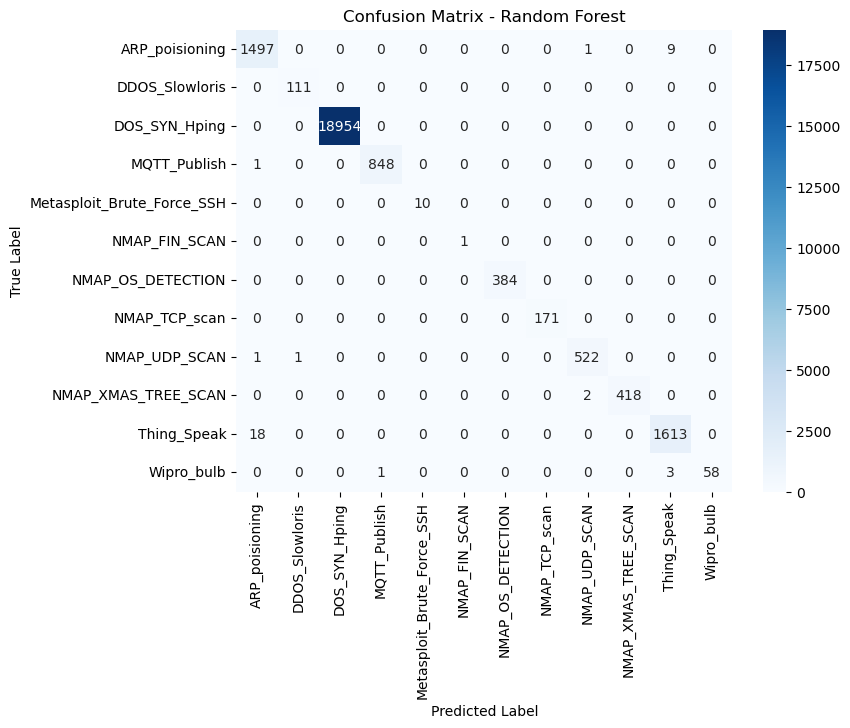

In [145]:
# Initialize the Random Forest model
rf_model = RandomForestClassifier(random_state=42, n_estimators=100)

# Fit the model using the SMOTE-resampled and scaled training data
rf_model.fit(X_train_smote_norm, y_smote)

# Predict on the test set
y_pred_smote_rf = rf_model.predict(X_test_norm)

# Calculate accuracy
accuracy_rf = accuracy_score(y_test, y_pred_smote_rf)
print(f"Accuracy: {accuracy_rf:.4f}")

# Calculate precision
precision_rf = precision_score(y_test, y_pred_smote_rf, average='weighted')
print(f"Precision: {precision_rf:.4f}")

# Calculate recall
recall_rf = recall_score(y_test, y_pred_smote_rf, average='weighted')
print(f"Recall: {recall_rf:.4f}")

# Manually define the label mapping
label_mapping = {
    0: 'ARP_poisioning',
    1: 'DDOS_Slowloris',
    2: 'DOS_SYN_Hping',
    3: 'MQTT_Publish',
    4: 'Metasploit_Brute_Force_SSH',
    5: 'NMAP_FIN_SCAN',
    6: 'NMAP_OS_DETECTION',
    7: 'NMAP_TCP_scan',
    8: 'NMAP_UDP_SCAN',
    9: 'NMAP_XMAS_TREE_SCAN',
    10: 'Thing_Speak',
    11: 'Wipro_bulb',}

# Convert y_test and y_pred to their original class names using the manual mapping
y_test_original = pd.Series(y_test).map(label_mapping)
y_pred_original = pd.Series(y_pred_smote_rf).map(label_mapping)

print("\nClassification Report:")
print(classification_report(y_test_original, y_pred_original))

# Generate the confusion matrix
conf_matrix_rf = confusion_matrix(y_test_original, y_pred_original)

# Plot the confusion matrix with manually defined class names
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix_rf, annot=True, fmt='d', cmap='Blues', xticklabels=list(label_mapping.values()), yticklabels=list(label_mapping.values()))
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix - Random Forest')
plt.show()


# RF Under

Accuracy: 0.9863
Precision: 0.9920
Recall: 0.9863

Classification Report:
                            precision    recall  f1-score   support

            ARP_poisioning       0.97      0.87      0.92      1507
            DDOS_Slowloris       0.69      0.99      0.81       111
             DOS_SYN_Hping       1.00      1.00      1.00     18954
              MQTT_Publish       0.99      1.00      0.99       849
Metasploit_Brute_Force_SSH       0.08      1.00      0.15        10
             NMAP_FIN_SCAN       0.06      1.00      0.11         1
         NMAP_OS_DETECTION       1.00      1.00      1.00       384
             NMAP_TCP_scan       1.00      0.99      1.00       171
             NMAP_UDP_SCAN       0.96      0.94      0.95       524
       NMAP_XMAS_TREE_SCAN       1.00      1.00      1.00       420
               Thing_Speak       0.97      0.94      0.95      1631
                Wipro_bulb       0.58      0.95      0.72        62

                  accuracy              

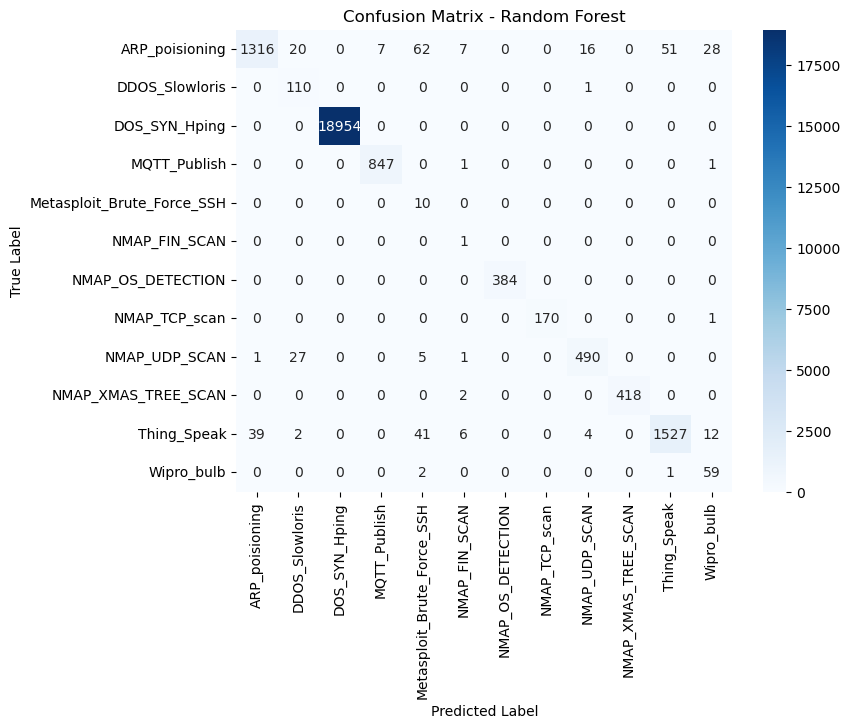

In [148]:
# Initialize the Random Forest model
rf_model = RandomForestClassifier(random_state=42, n_estimators=100)

# Fit the model using the SMOTE-resampled and scaled training data
rf_model.fit(X_train_under_norm, y_under)

# Predict on the test set
y_pred_under_rf = rf_model.predict(X_test_norm)

# Calculate accuracy
accuracy_rf = accuracy_score(y_test, y_pred_under_rf)
print(f"Accuracy: {accuracy_rf:.4f}")

# Calculate precision
precision_rf = precision_score(y_test, y_pred_under_rf, average='weighted')
print(f"Precision: {precision_rf:.4f}")

# Calculate recall
recall_rf = recall_score(y_test, y_pred_under_rf, average='weighted')
print(f"Recall: {recall_rf:.4f}")

# Manually define the label mapping
label_mapping = {
    0: 'ARP_poisioning',
    1: 'DDOS_Slowloris',
    2: 'DOS_SYN_Hping',
    3: 'MQTT_Publish',
    4: 'Metasploit_Brute_Force_SSH',
    5: 'NMAP_FIN_SCAN',
    6: 'NMAP_OS_DETECTION',
    7: 'NMAP_TCP_scan',
    8: 'NMAP_UDP_SCAN',
    9: 'NMAP_XMAS_TREE_SCAN',
    10: 'Thing_Speak',
    11: 'Wipro_bulb',}

# Convert y_test and y_pred to their original class names using the manual mapping
y_test_original = pd.Series(y_test).map(label_mapping)
y_pred_original = pd.Series(y_pred_under_rf).map(label_mapping)

print("\nClassification Report:")
print(classification_report(y_test_original, y_pred_original))

# Generate the confusion matrix
conf_matrix_rf = confusion_matrix(y_test_original, y_pred_original)

# Plot the confusion matrix with manually defined class names
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix_rf, annot=True, fmt='d', cmap='Blues', xticklabels=list(label_mapping.values()), yticklabels=list(label_mapping.values()))
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix - Random Forest')
plt.show()


# RF Normal

Accuracy: 0.9984
Precision: 0.9984
Recall: 0.9984

Classification Report:
                            precision    recall  f1-score   support

            ARP_poisioning       0.98      1.00      0.99      1507
            DDOS_Slowloris       1.00      1.00      1.00       111
             DOS_SYN_Hping       1.00      1.00      1.00     18954
              MQTT_Publish       1.00      1.00      1.00       849
Metasploit_Brute_Force_SSH       1.00      1.00      1.00        10
             NMAP_FIN_SCAN       1.00      1.00      1.00         1
         NMAP_OS_DETECTION       1.00      1.00      1.00       384
             NMAP_TCP_scan       1.00      1.00      1.00       171
             NMAP_UDP_SCAN       1.00      1.00      1.00       524
       NMAP_XMAS_TREE_SCAN       1.00      1.00      1.00       420
               Thing_Speak       0.99      0.99      0.99      1631
                Wipro_bulb       1.00      0.90      0.95        62

                  accuracy              

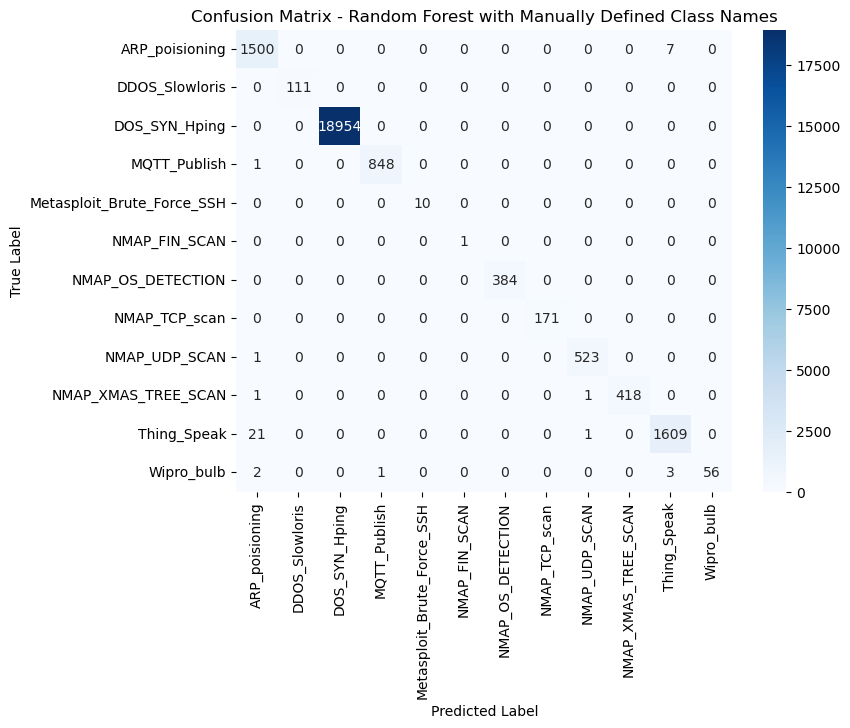

In [156]:
# Initialize the Random Forest model
rf_model = RandomForestClassifier(random_state=42, n_estimators=100)

# Fit the model 
rf_model.fit(X_train_norm, y_train)

# Predict on the test set
y_pred_rf = rf_model.predict(X_test_norm)

# Calculate accuracy
accuracy_rf = accuracy_score(y_test, y_pred_rf)
print(f"Accuracy: {accuracy_rf:.4f}")

# Calculate precision
precision_rf = precision_score(y_test, y_pred_rf, average='weighted')
print(f"Precision: {precision_rf:.4f}")

# Calculate recall
recall_rf = recall_score(y_test, y_pred_rf, average='weighted')
print(f"Recall: {recall_rf:.4f}")

# Manually define the label mapping
label_mapping = {
    0: 'ARP_poisioning',
    1: 'DDOS_Slowloris',
    2: 'DOS_SYN_Hping',
    3: 'MQTT_Publish',
    4: 'Metasploit_Brute_Force_SSH',
    5: 'NMAP_FIN_SCAN',
    6: 'NMAP_OS_DETECTION',
    7: 'NMAP_TCP_scan',
    8: 'NMAP_UDP_SCAN',
    9: 'NMAP_XMAS_TREE_SCAN',
    10: 'Thing_Speak',
    11: 'Wipro_bulb',}

# Convert y_test and y_pred to their original class names using the manual mapping
y_test_original = pd.Series(y_test).map(label_mapping)
y_pred_original = pd.Series(y_pred_rf).map(label_mapping)

# Print the classification report with manually defined class names
print("\nClassification Report:")
print(classification_report(y_test_original, y_pred_original))

# Generate the confusion matrix
conf_matrix_rf = confusion_matrix(y_test_original, y_pred_original)

# Plot the confusion matrix with manually defined class names
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix_rf, annot=True, fmt='d', cmap='Blues', xticklabels=list(label_mapping.values()), yticklabels=list(label_mapping.values()))
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix - Random Forest with Manually Defined Class Names')
plt.show()
